# Neural Net Examples

## Step 1: Simulate some data

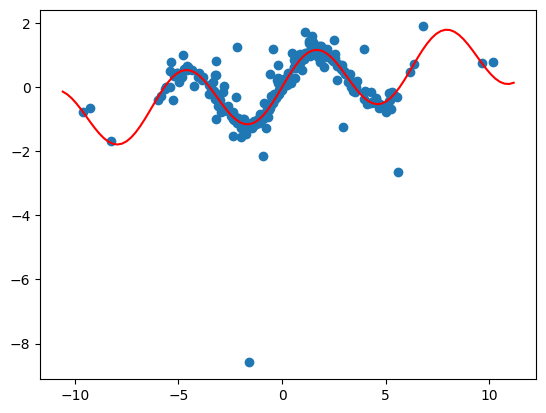

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
import random

# random.seed(666)
np.random.seed(666)
tf.random.set_seed(666)

# simulate data
def f(x):
    return np.sin(x) + x / 10

n = 300
x = 3 * np.random.randn(n)
y = f(x) + 0.2 * np.array(random.choices([-1.0, 1.0], k=n)) * np.random.pareto(a = 2, size=n)



plt.scatter(x, y)
x_rng = np.linspace(x.min() - 1, x.max() + 1, 100)
y_true = [f(x) for x in x_rng]
plt.plot(x_rng, y_true, color="red")

plt.show()

# when you use this on real data, you'll import the data directly from a file
df = pd.DataFrame({"x": x, "y": y})

#### Split the data into training and testing sets

Just like with other machine learning methods, you'll want to split the data into training and testing sets.
The code below does this.
_You can directly copy and paste the following code without any modification._


In [2]:
train_perc = 0.8 # 80% of the data will be used for training

train_size = int(train_perc * len(df))
test_size = len(df) - train_size
train_df, test_df = train_test_split(df, test_size=test_size, random_state=666)
#### Where / how will the code run?

#### Define the Neural Network
This is the most important part of the code.
It defines the structure of the neural network.
Neural networks have 'layers' that typically comprise of a linear transformation followed by a non-linear transformation.
The code below defines a simple neural network with one hidden layer.

_You can use the code below as a starting point, but you will need to modify it to fit your specific problem._

In [3]:
model = keras.Sequential([
    layers.Dense(100, activation="relu", input_shape=(1,)),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),

    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train the Neural Network

The code below trains the neural network.
_You can directly copy and paste the following code with minimal modification._


In [4]:
x_train = train_df["x"].values
y_train = train_df["y"].values
x_test = test_df["x"].values
y_test = test_df["y"].values
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=200, verbose=1)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9273 - val_loss: 0.6050
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8617 - val_loss: 0.6016
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8358 - val_loss: 0.5799
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8054 - val_loss: 0.5290
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7581 - val_loss: 0.4778
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7095 - val_loss: 0.4306
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6655 - val_loss: 0.3915
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6233 - val_loss: 0.3373
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5897 - val_loss: 0.2951
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5574 - val_loss: 0.2604
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5286 - val_loss: 0.2226
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4958 - val_loss: 0.2049


#### Plot the Losses


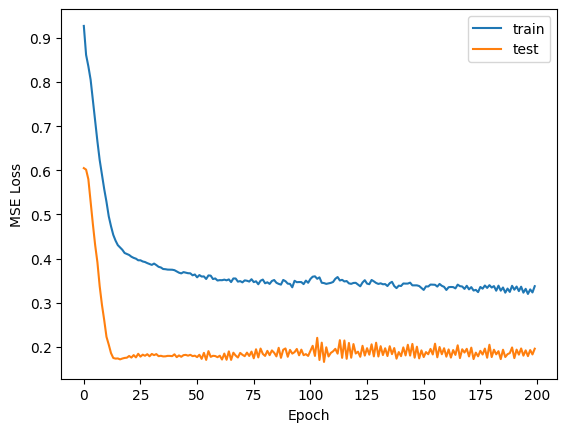

In [5]:
# plot the loss curves
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


### Inspect the Results

The code below plots the predictions of the neural network against the true values.
This will help you understand how well the neural network is performing.
This code is mostly useful for demonstration in this simple example and may not be useful in more complex problems.


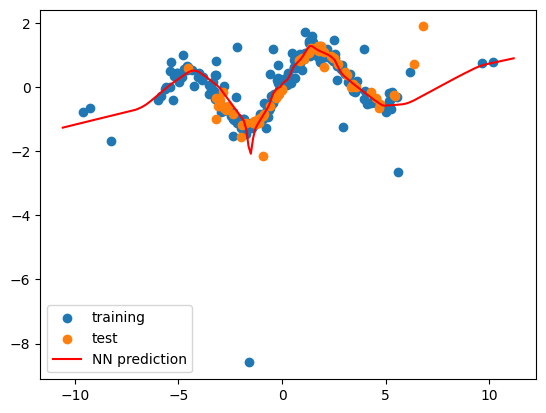

In [6]:
x_rng = np.linspace(x.min()-1, x.max()+1, 200)
y_pred = model.predict(x_rng, verbose=0)

plt.scatter(x_train, y_train, label="training")
plt.scatter(x_test, y_test, label="test")
plt.plot(x_rng, y_pred, color="red", label="NN prediction")
plt.legend()
plt.show()

Neural networks are just functions.


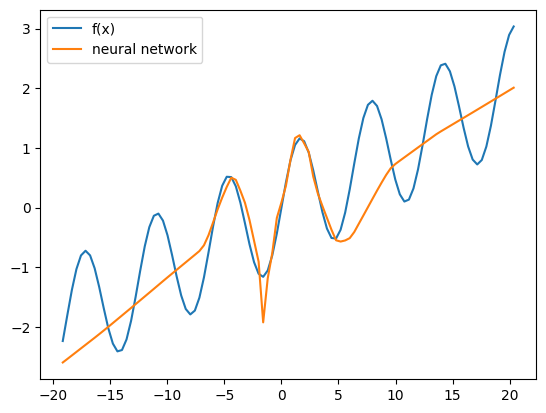

In [7]:
n_points = 100
# plot f() and the neural network
x_rng2 = np.linspace(min(x) * 2, max(x) * 2, n_points)
y = [f(x_rng2[i]) for i in range(n_points)]
plt.plot(x_rng2, y, label="f(x)")
y = model.predict(x_rng2, verbose=0)
plt.plot(x_rng2, y, label="neural network")
plt.legend()
plt.show()

## Another Example


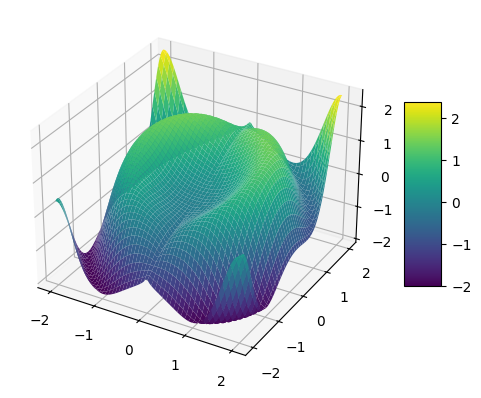

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import random

np.random.seed(666)
tf.random.set_seed(666)

def f(x, y):
    return np.sin(x**2 + y**2) * np.sqrt(np.abs(x)) + y / 2

mn, mx = -2, 2
x = np.linspace(mn, mx, 100)
y = np.linspace(mn, mx, 100)

# create a grid of x and y values
df = pd.DataFrame({"x": np.tile(x, len(y)), "y": np.repeat(y, len(x))})
df["z"] = [f(x, y) for x, y in zip(df["x"], df["y"])]

# plot the function
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
Z = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
plot = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(plot, shrink=0.5, aspect=5)
plt.show()

# sample a smaller subset for training/testing
df = df.sample(1000, random_state=666).reset_index(drop=True)

In [9]:
train_perc = 0.8
train_size = int(train_perc * len(df))
test_size = len(df) - train_size
train_df, test_df = train_test_split(df, test_size=test_size, random_state=666)

In [10]:
model = keras.Sequential([
    layers.Dense(10, activation="relu", input_shape=(2,)),
    # layers.Dense(10, activation="relu"),
    # layers.Dense(10, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Fit the Neural Network


In [11]:
x_train = train_df[["x", "y"]].values
y_train = train_df["z"].values
x_test = test_df[["x", "y"]].values
y_test = test_df["z"].values

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=500,
                    verbose=1)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9614 - val_loss: 0.9307
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8547 - val_loss: 0.8420
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7691 - val_loss: 0.7708
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6986 - val_loss: 0.7120
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6407 - val_loss: 0.6624
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5931 - val_loss: 0.6207
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5553 - val_loss: 0.5878
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5278 - val_loss: 0.5633
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5080 - val_loss: 0.5432
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4927 - val_loss: 0.5263
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4805 - val_loss: 0.5123
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4

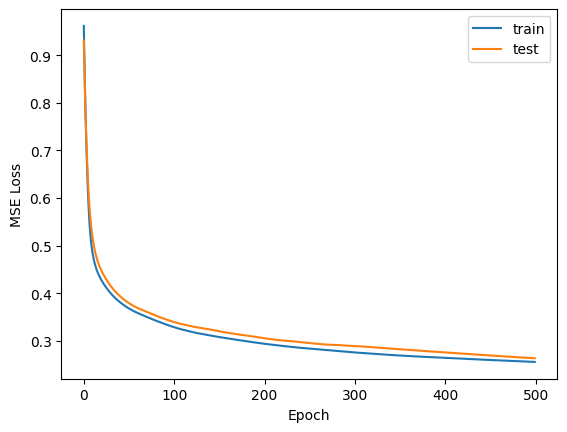

In [12]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

### Inspect the Results


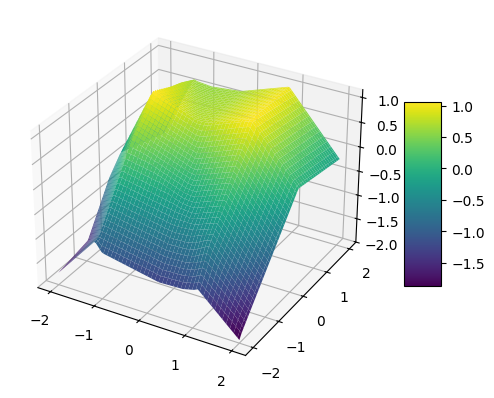

In [13]:
x_rng = np.linspace(mn, mx, 100)
y_rng = np.linspace(mn, mx, 100)
X, Y = np.meshgrid(x_rng, y_rng)
XY_input = np.column_stack([X.ravel(), Y.ravel()])
Z_pred = model.predict(XY_input, verbose=0).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(X, Y, Z_pred, cmap='viridis')
fig.colorbar(plot, shrink=0.5, aspect=5)
plt.show()

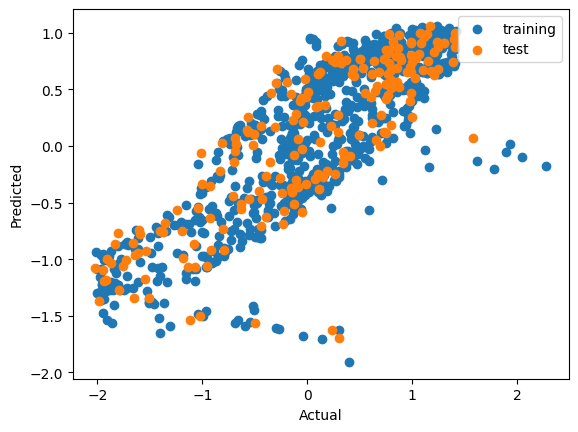

In [14]:
y_train_pred = model.predict(x_train, verbose=0)
y_test_pred = model.predict(x_test, verbose=0)

plt.scatter(y_train, y_train_pred, label="training")
plt.scatter(y_test, y_test_pred, label="test")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()